Going to solve some coupled ODEs with torch

In [13]:
import torch
import matplotlib.pyplot as plt
from torchdiffeq import odeint

Predator Prey Model

In [14]:
# Simulation parameters
alpha = 1.1
beta = 0.4
delta = 0.4
gamma = 0.9

y0 = torch.tensor([10.0, 2.0]) # [Rabbits, Foxes]

t_points = torch.linspace(0.0, 80.0, steps = 8000) # This tells the solver where we want our solution to be evaluated

In [ ]:
# Defining class for torchdiffeq

class PredatorPrey(torch.nn.Module):
    def forward(self, t, y):
        R, F = y[0], y[1]
        dR_dt = alpha * R - beta * R * F
        dF_dt = delta * R * F - gamma * F
        return torch.tensor([dR_dt, dF_dt])
    
'''
torch.nn.Module ensuresthat this class inherits the systems of pytorch's base Module class

torchdiffeq is made to work with the forward function of the class. 
'''

'\n\n'

In [16]:
# Solving the ODE
model = PredatorPrey()
solution = odeint(model, y0, t_points)

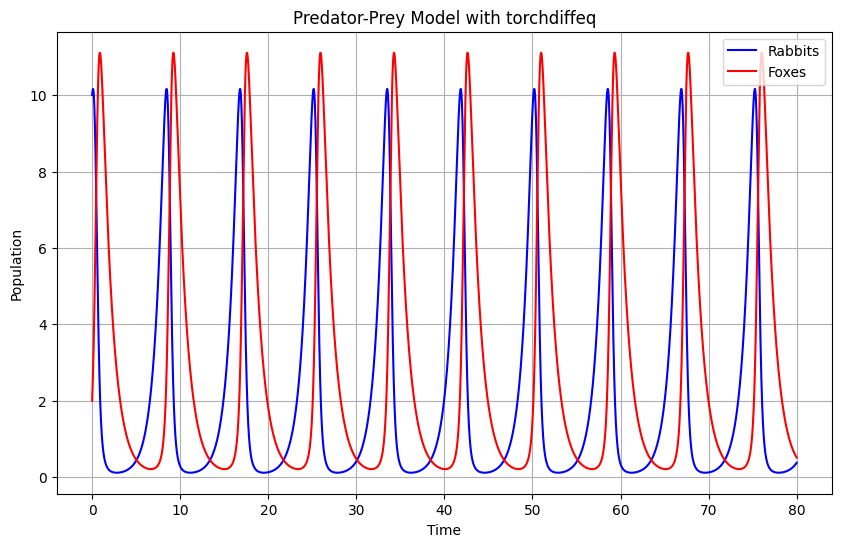

In [17]:
rabbits = solution[:, 0]
foxes = solution[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(t_points.numpy(), rabbits.numpy(), 'b-', label='Rabbits')
plt.plot(t_points.numpy(), foxes.numpy(), 'r-', label='Foxes')
plt.title('Predator-Prey Model with torchdiffeq')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()